## Revisão da última aula

Calculando a diferença entre função e pontos.

Essa distância chamamos de $\chi^2$ e ela é a soma das distâncias entre ponto e reta $d_i^2=(f(x_i)-y_i)^2$. Vamos supor que temos, no total, $n$ pontos.

$$\chi^2=d_1^2+d_2^2+d_3^2+\cdots+d_n^2$$

$$f(x)=ax+b$$

$$\chi^2=(f(x_1)-y_1)^2+(f(x_2)-y_2)^2+\cdots$$

$$\chi^2=(ax_1+b-y_1)^2+(ax_2+b-y_2)^2+\cdots$$

$$\chi^2=a^2 x_1^2 + 2 a b x_1 - 2 a x_1 y_1 + b^2 - 2 b y_1 + y_1^2+\cdots$$

$$\chi^2=a^2(x_1^2+x_2^2+\cdots)+2ab(x_1+x_2+\cdots)-2a(x_1y_1+x_2y_2+\cdots)+nb^2-2b(y_1+y_2\cdots)+(y_1+y_2+\cdots)$$

Chamo $X_q=x_1^2+x_2^2+\cdots$, $X=x_1+x_2+\cdots$, $Y=y_1+y_2+\cdots$ e $\mu=x_1y_1+x_2y_2+\cdots$ 

$$\chi^2=a^2X_q+2abX-2a\mu+nb^2-2bY+Y$$

$$\frac{\partial \chi^2}{\partial a}=0$$
$$\frac{\partial \chi^2}{\partial b}=0$$

$$2aX_q+2bX-2\mu=0$$
$$2aX+2nb-2Y=0$$

$$aX_q+bX-\mu=0$$
$$aX+nb-Y=0$$

Podemos isolar $b$ da primeira equação e substituir na segunda:

$$b=\frac{\mu-aX_q}{X}$$
$$aX+n\frac{\mu-aX_q}{X}-Y=0$$

$$\frac{aX^2+n\mu-naX_q-YX}{X}=0$$
$$a(X^2-nX_q)=YX-n\mu$$
$$a=\frac{YX-n\mu}{X^2-nX_q}$$

Posso pegar esse valor de $a$ e encontrar uma fórmula para $b$, usando a formula anterior $$aX+nb-Y=0$$.

$$b=\frac{Y-aX}{n}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Vamos criar um conjnto de dados aleatórios:

In [2]:
x_train = np.random.randint(1,100, size=(15))
y_train = np.random.randint(1,50, size=(15))

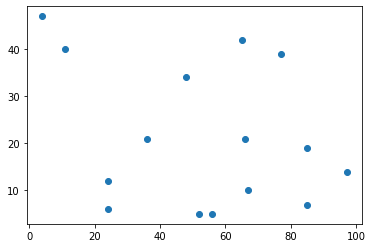

In [4]:
plt.plot(x_train,y_train, 'o')

In [5]:
def mmq(ar_x,ar_y):
    
    n = len(ar_x) #Tamanho do meu conjunto de dados
    
    if n != len(ar_y):
        return print('Dados de treino tem dimensões diferentes!')
    
    somax = 0
    for i in range(0,n):  # soma x_0+x_1+ ...
        somax += ar_x[i]
        
    somay = 0
    for i in range(0,n):  # soma y_0+y_1+ ...
        somay += ar_y[i]
        
    somax2 = 0
    for i in range(0,n):  # soma x²_0+x²_1+ ...
        somax2 += ar_x[i]**2
        
    somaxy = 0
    for i in range(0,n):  # soma x_0y_0+x_1y_1+ ...
        somaxy += ar_x[i]*ar_y[i]
        
    a = (n*somaxy-somay*somax)/(n*somax2-somax**2)
    b = (-a*somax2+somaxy)/somax
    
    return a, b

In [8]:
mmq(x_train,y_train)

(-0.15693729388597594, 29.805268215141524)

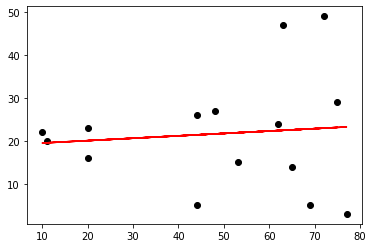

In [9]:
x_train = np.random.randint(1,100, size=(15))
y_train = np.random.randint(1,50, size=(15))

a, b = mmq(x_train,y_train)

func = []

for i in x_train:
    func.append(a*i+b)
    
plt.plot(x_train, y_train, 'o', color='black')
plt.plot(x_train, func, '-', color='red')
plt.show()

In [10]:
def mmq_plot(ar_x,ar_y):
    
    a, b = mmq(ar_x,ar_y)

    func = []

    for i in ar_x:
        func.append(a*i+b)

    plt.plot(ar_x, ar_y, 'o', color='black')
    plt.plot(ar_x, func, '-', color='red')
    plt.show()
    
    print(f'a = {a}')
    print(f'b = {b}')

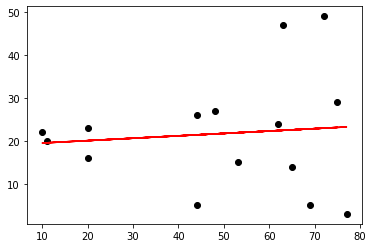

a = 0.05584518712884961
b = 18.93769852230355


In [11]:
mmq_plot(x_train,y_train)

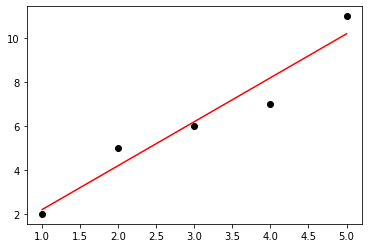

a = 2.0
b = 0.2


In [14]:
mmq_plot([1,2,3,4,5],[2,5,6,7,11])

Vamos olhar para um exemplo de dados reais e para isso vamos usar uma nova biblioteca:

In [15]:
import pandas as pd

In [16]:
data = pd.read_csv('data.txt', sep=',', header=None)
data.columns = ['ftq', 'room', 'price']

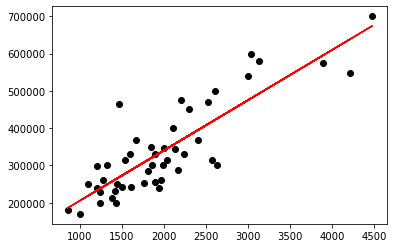

a = 134.52528772024132
b = 71270.49244872911


In [19]:
mmq_plot(data.ftq,data.price)

In [20]:
mmq(data.ftq,data.price)

(134.52528772024132, 71270.49244872911)

In [21]:
def previsao(tamanho):
    a, b = mmq(data.ftq,data.price)
    
    return f'O preço previsto do apartamento deve ser por volta de {int(a*tamanho+b)} dolares.'

In [23]:
tamanho = int(input('Informe a metragem em ftq do apartamento: '))

previsao(tamanho)

Informe a metragem em ftq do apartamento: 10000


'O preço previsto do apartamento deve ser por volta de 1416523 dolares.'

Nossa nova métrica de qualidade será $\frac{\chi^2}{2n}$, onde o fator $n$ reflete o fato de que temos uma maior confiança em ajustes com mais pontos.